In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import pickle
import librosa
import librosa.display
from IPython.display import Audio
import tensorflow as tf
import keras

In [2]:
df=pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [5]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [6]:
df=df.drop(labels='filename', axis=1)

In [8]:
audio_recording="D:\ML\Data\genres_original\country\country.00050.wav"
data, sr=librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [9]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
        -0.11823352, -0.05911855], dtype=float32),
 45600)

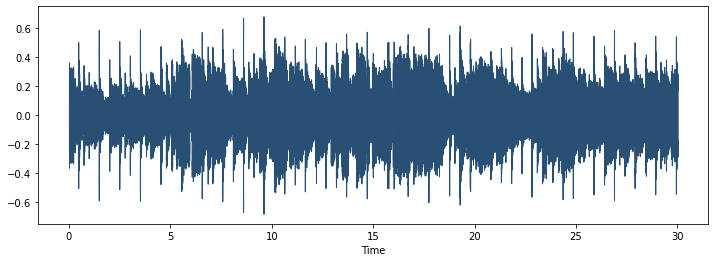

In [11]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color="#284F74")
plt.show()

C:\Users\Mallika\AppData\Roaming\Python\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


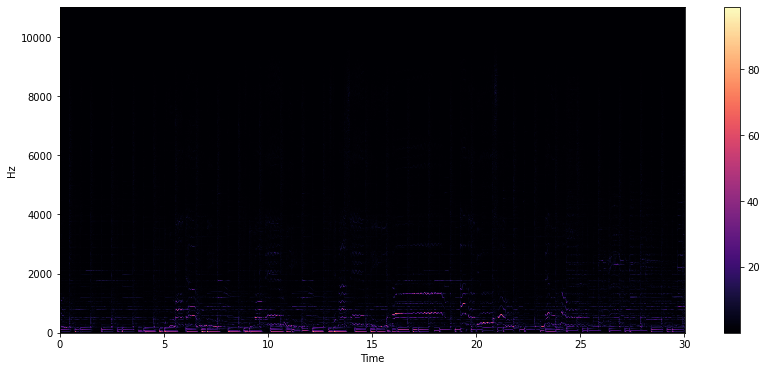

In [13]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

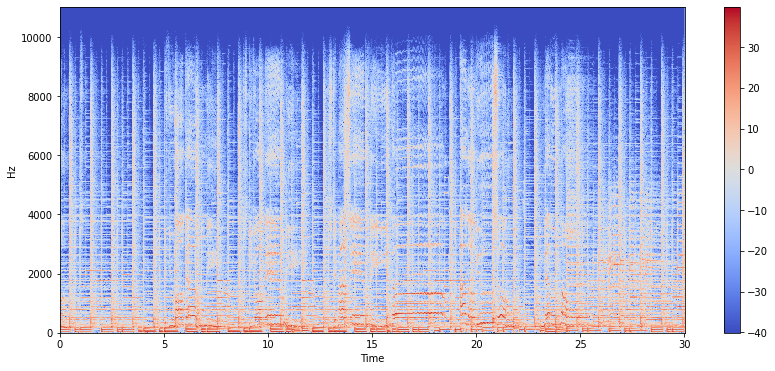

In [15]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

C:\Users\Mallika\AppData\Local\Temp\ipykernel_14304\2073425650.py:2: FutureWarning: Pass y=[ 0.05617309  0.06691528  0.01158691 ... -0.04786133 -0.09861206
 -0.11380982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]


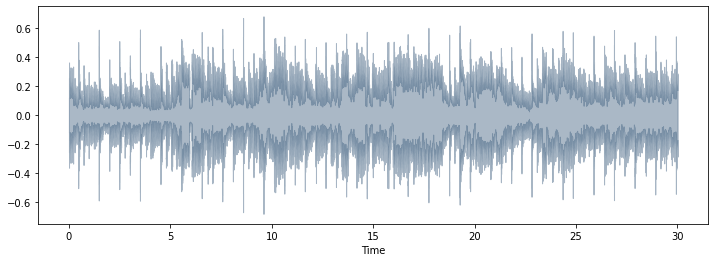

In [17]:
from sklearn.preprocessing import normalize 
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color='#2B4F72')

C:\Users\Mallika\AppData\Local\Temp\ipykernel_14304\3252887294.py:2: FutureWarning: Pass y=[ 0.0461731   0.05691528  0.00158691 ... -0.05786133 -0.10861206
 -0.12380981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma= librosa.feature.chroma_stft(data,sr=sr)


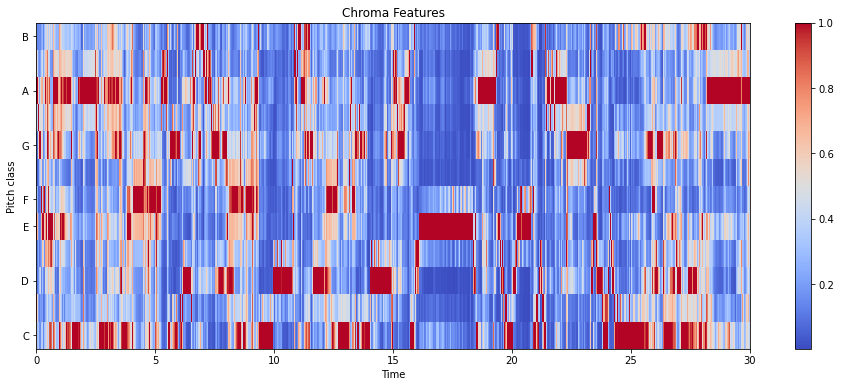

In [18]:
import librosa.display as lplt 
chroma= librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma,sr=sr,x_axis='time',y_axis='chroma',cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
class_l =df.iloc[:,-1]
conv=LabelEncoder()

In [24]:
y=conv.fit_transform(class_l)
y

array([0, 0, 0, ..., 9, 9, 9])

In [25]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [26]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:, :-1],dtype=float))